<a href="https://colab.research.google.com/github/Sartxy/MyProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCI Machine Learning Dataset (Portfolio Project 🙏🙏)



---



### SETUP 🛠🛠


> This setup is a solution to import the dataset from UCI Machine Learning Repository by using ```from ucimlrepo import fetch_ucirepo``` and import useful modules for this project, let's start it. 😀😀


> link for datasets:
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset





In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

datasets = fetch_ucirepo(id=468)
print(datasets.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, ttest_ind, f_oneway, chi2_contingency, tukey_hsd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



---



In [3]:
X = datasets.data.features
y = datasets.data.targets
df = pd.concat([X,y],axis=1)
display(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False




---



### Data Manipulaion & Exploration

> In this section, i need to investigate the data with many types of analysis such as univariate, bivariate and multivariate. To find an insight of the data and use to solve business problem in the next step.  



#### Univariate Analysis

In [4]:
ordered_month = ['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month'] = pd.Categorical(df['Month'],ordered_month,ordered=True)
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [5]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
cat_var = pd.concat([X.select_dtypes(['object']),X['Weekend'],y],axis=1)
num_var = X.select_dtypes('number')

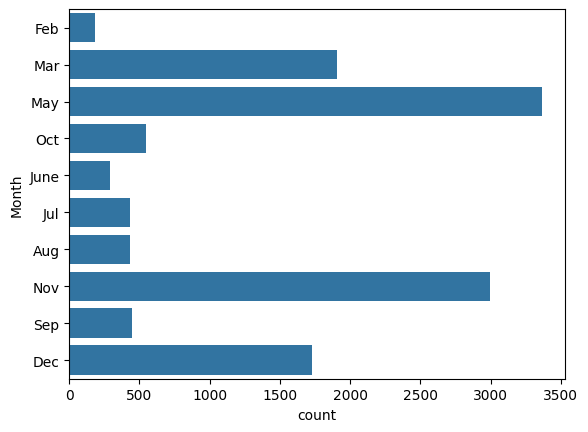

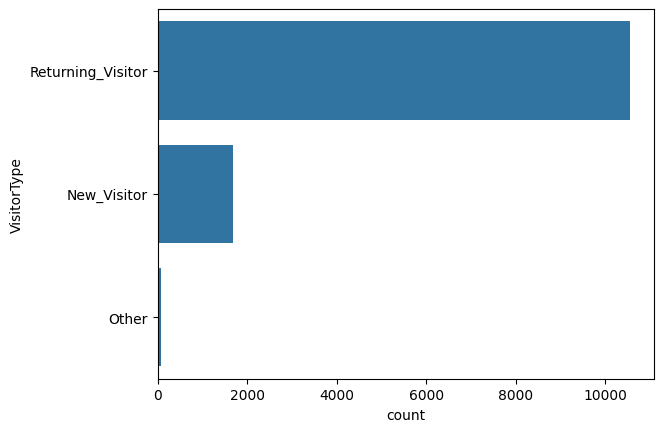

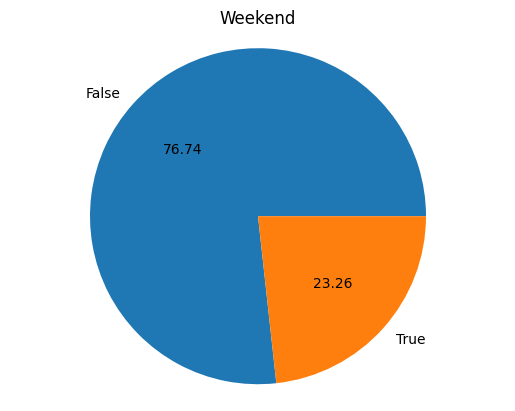

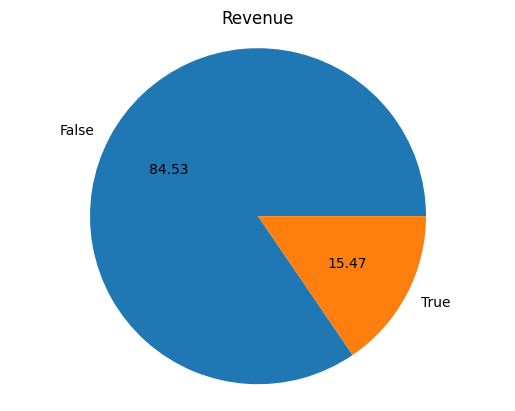

<Figure size 640x480 with 0 Axes>

In [7]:
# cat_var
for col in cat_var.columns[:-2]:
  sns.countplot(cat_var[col])
  plt.show()
  plt.clf()
cat_var.groupby('Weekend').size().plot(kind='pie',autopct='%.2f')
plt.title('Weekend')
plt.axis('equal')
plt.show()
plt.clf()
cat_var.groupby('Revenue').size().plot(kind='pie',autopct='%.2f')
plt.title('Revenue')
plt.axis('equal')
plt.show()
plt.clf()

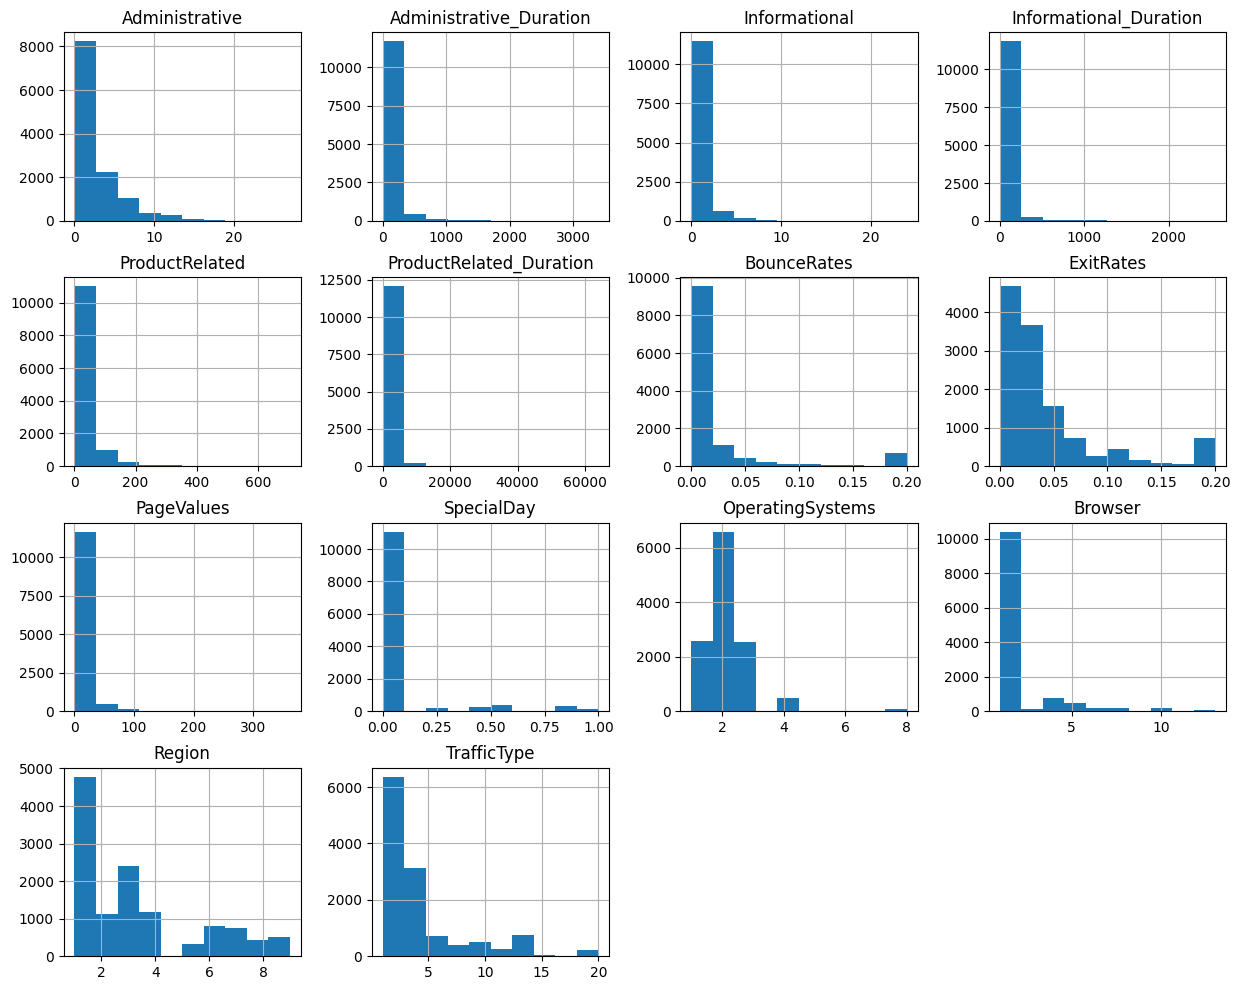

In [8]:
# num_var
num_var.hist(figsize=(15,12))
plt.show()

#### Bivariate Analysis

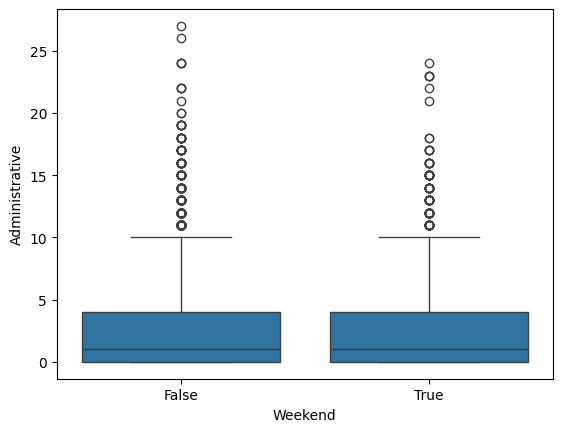

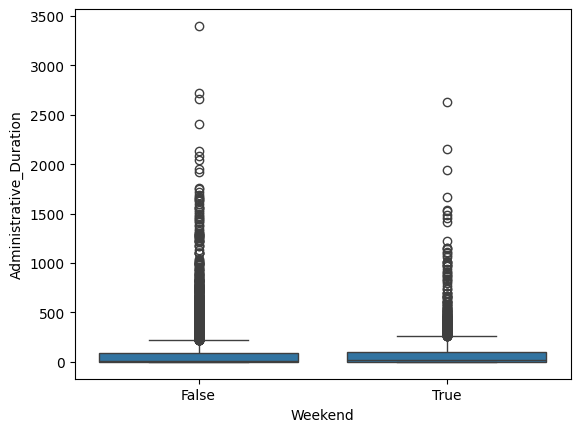

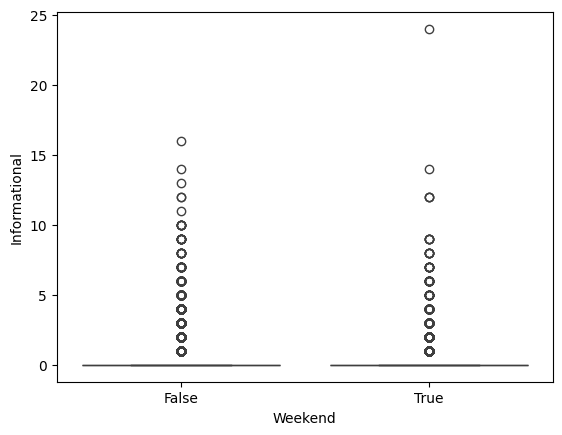

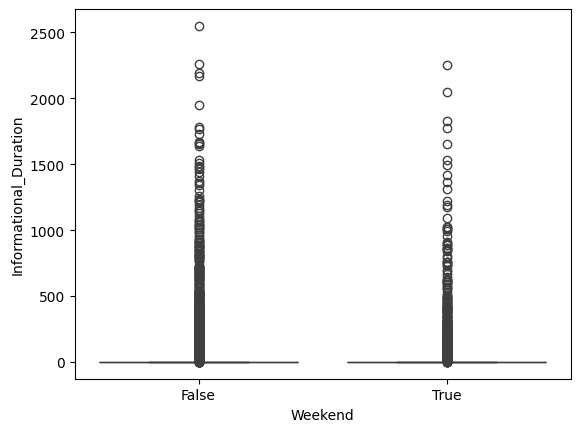

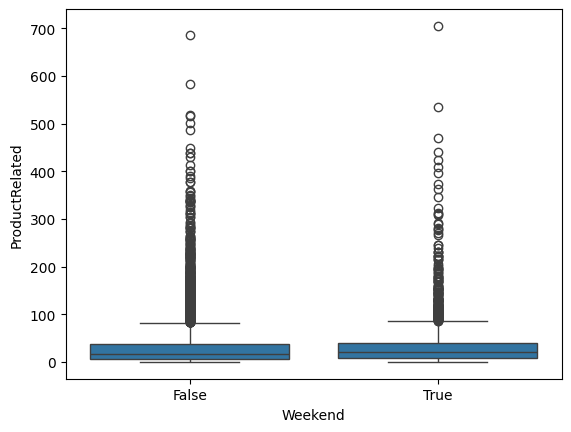

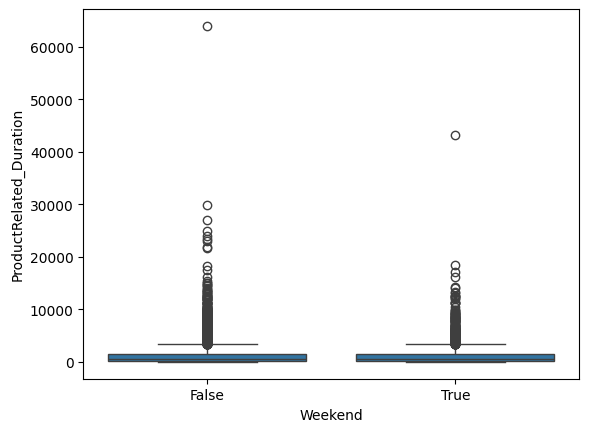

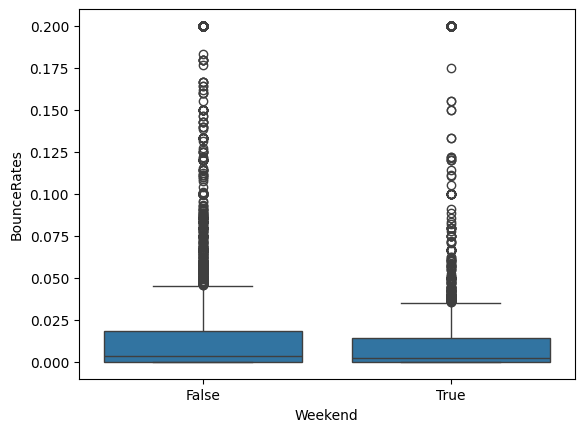

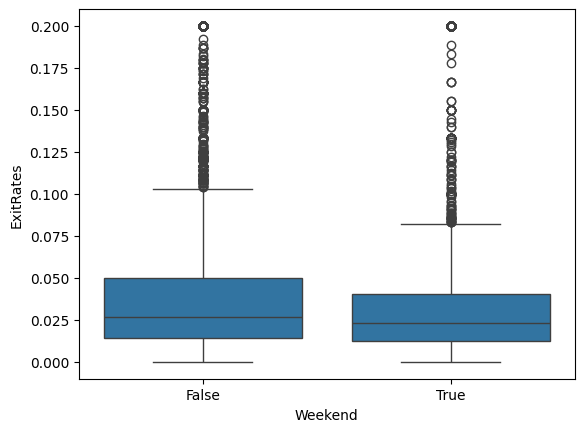

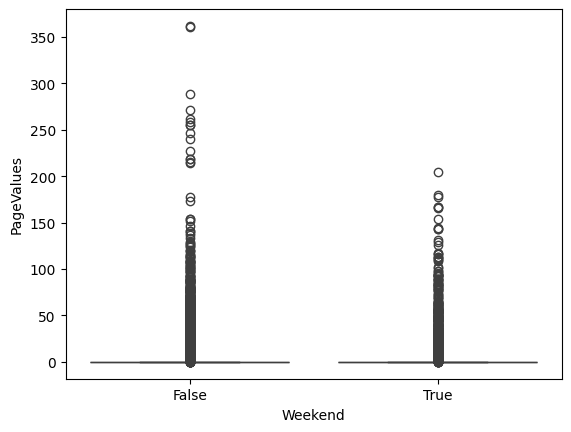

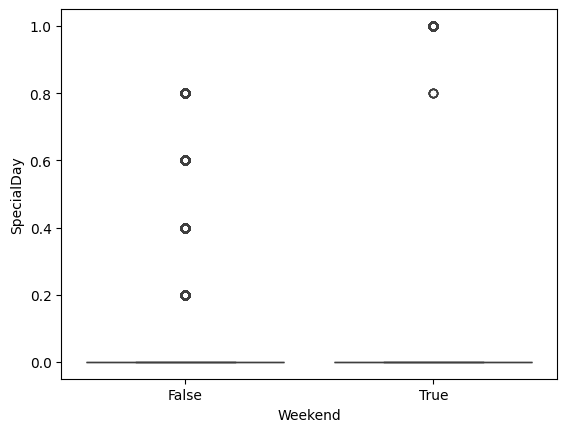

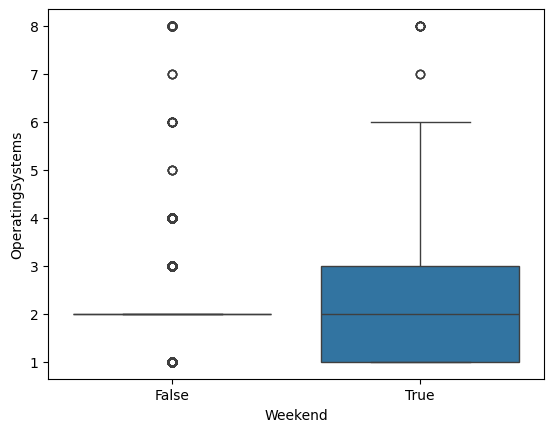

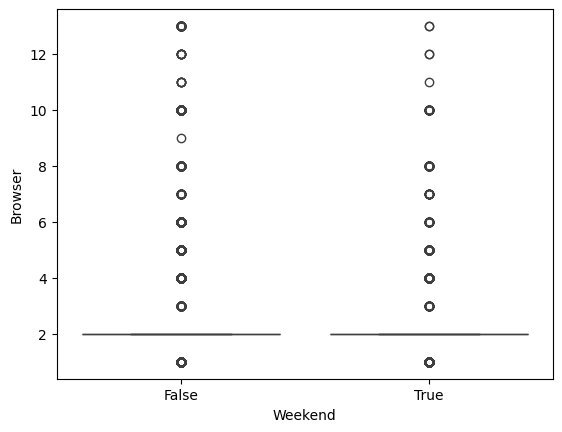

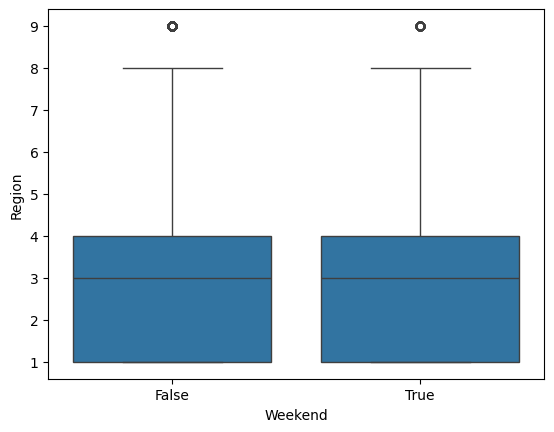

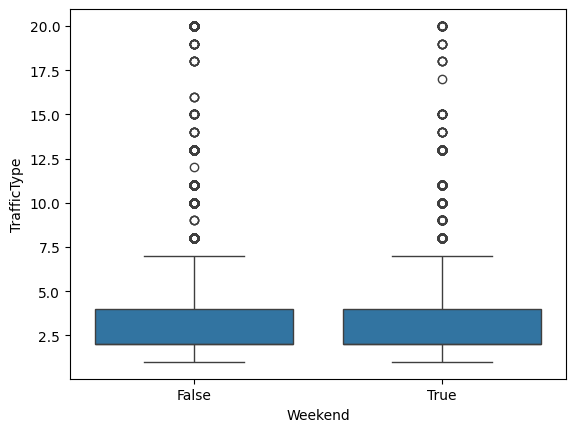

<Figure size 640x480 with 0 Axes>

In [9]:
## Boxplot between weekend and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='Weekend',data=df)
  plt.show()
  plt.clf()

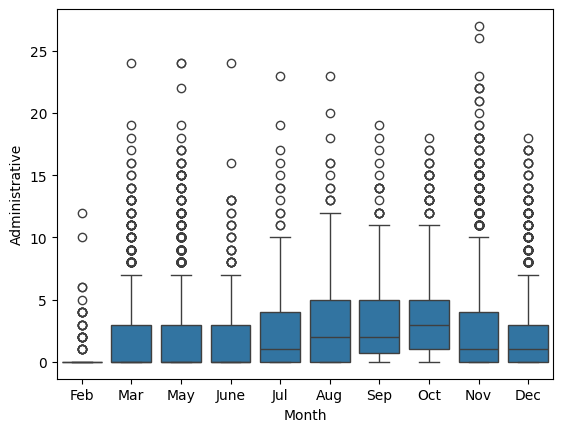

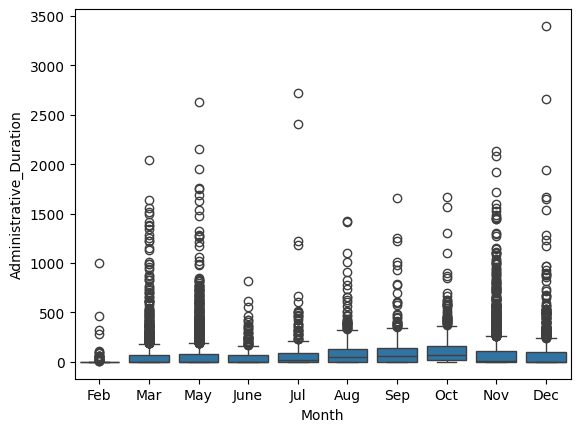

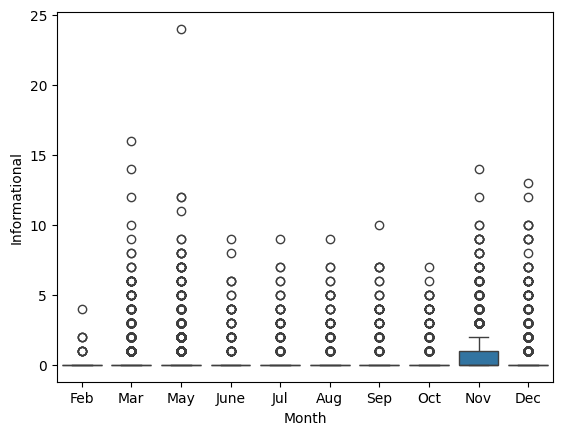

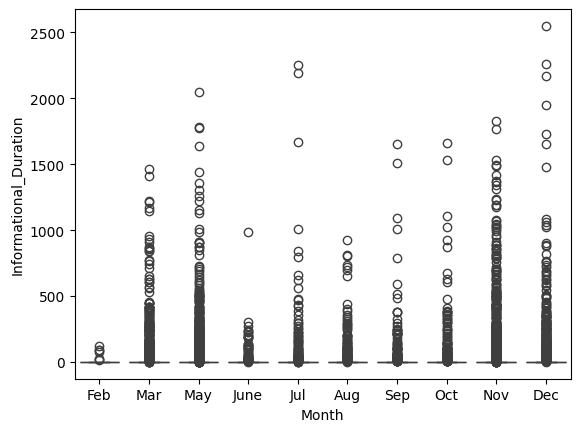

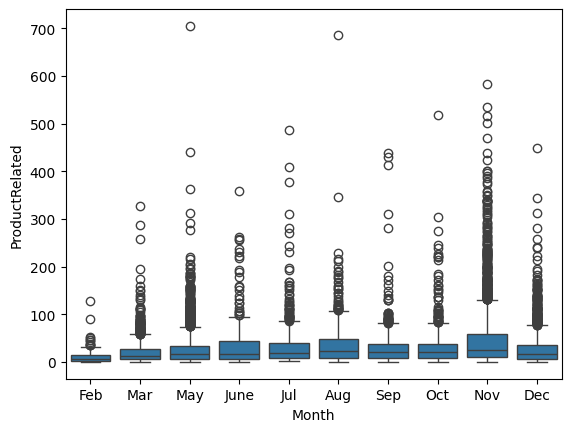

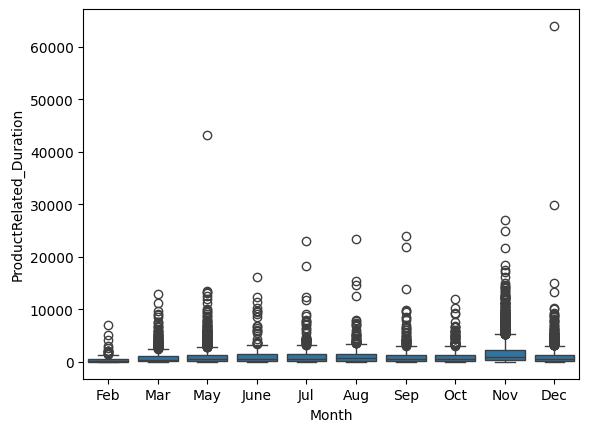

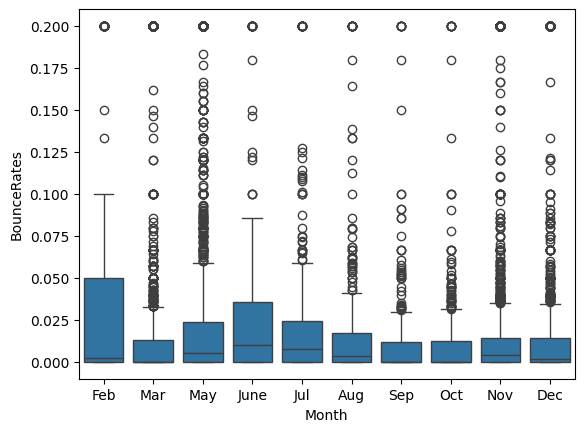

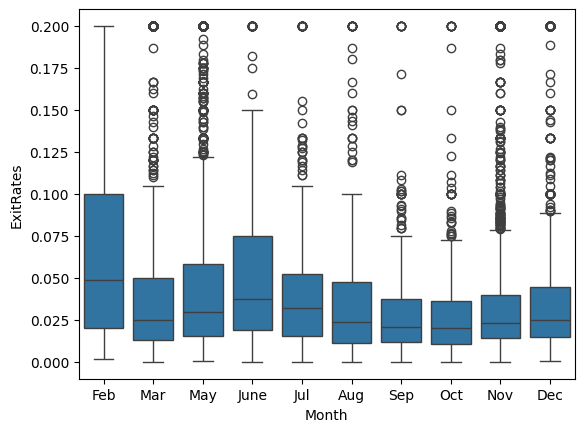

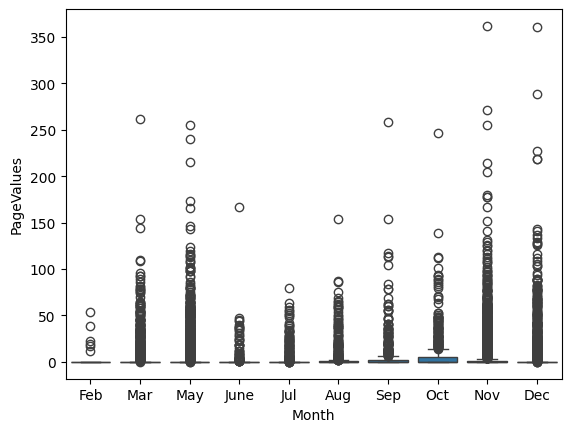

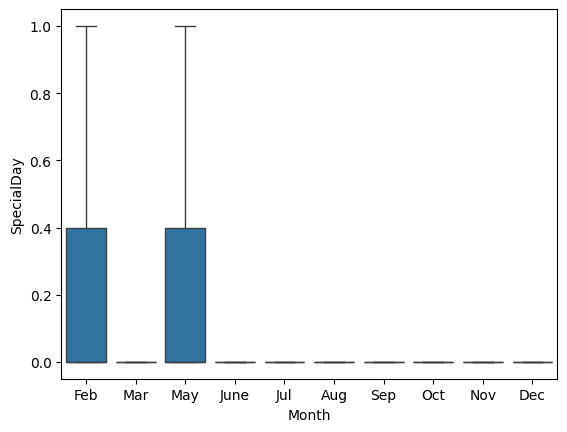

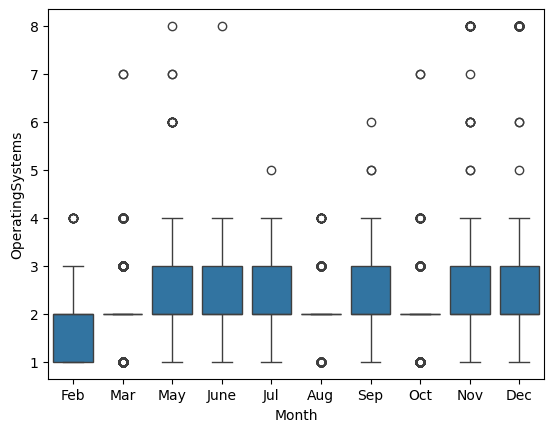

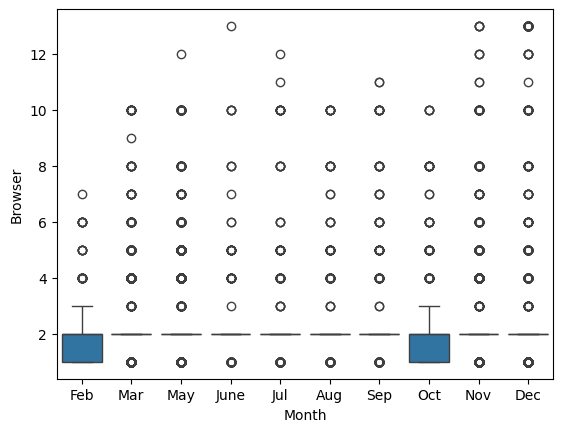

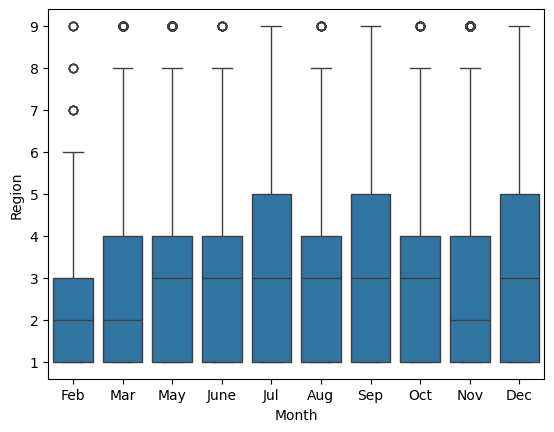

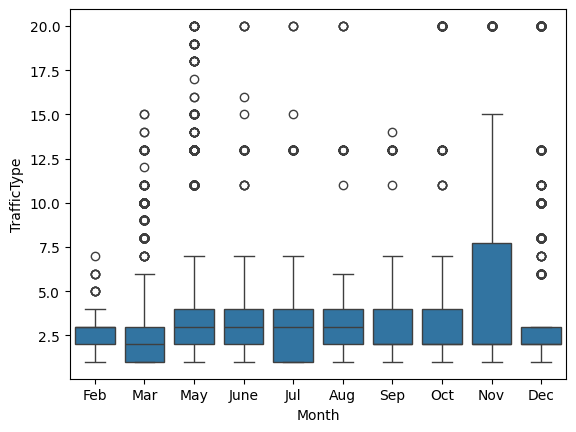

<Figure size 640x480 with 0 Axes>

In [10]:
## Boxplot between Month and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='Month',data=df)
  plt.show()
  plt.clf()

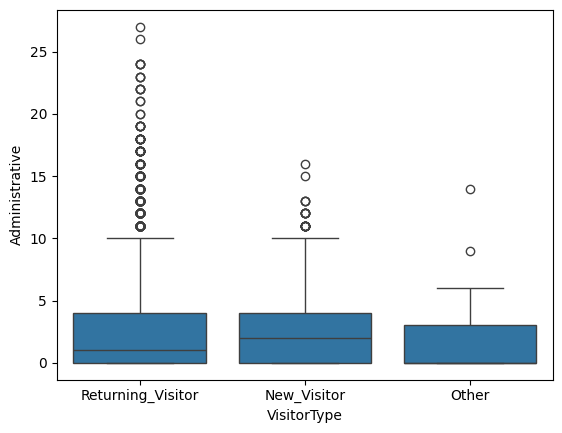

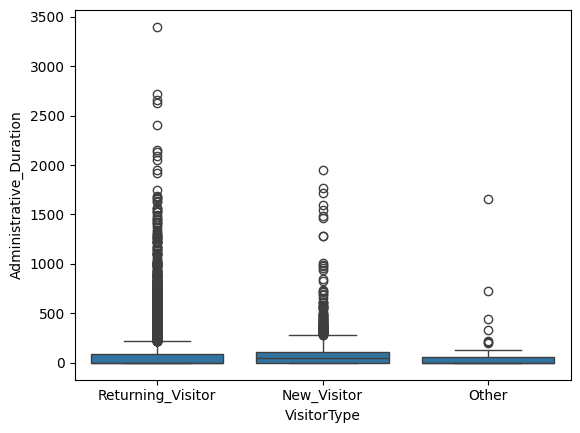

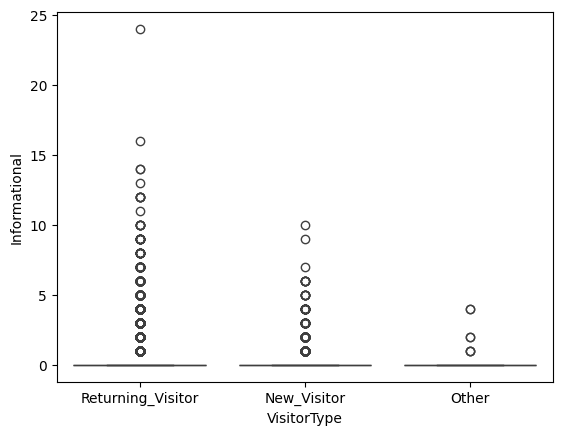

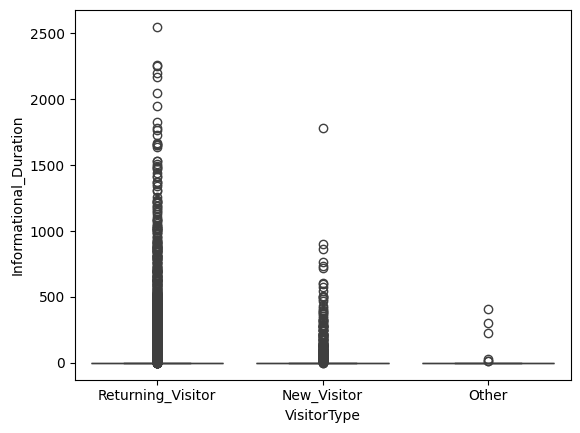

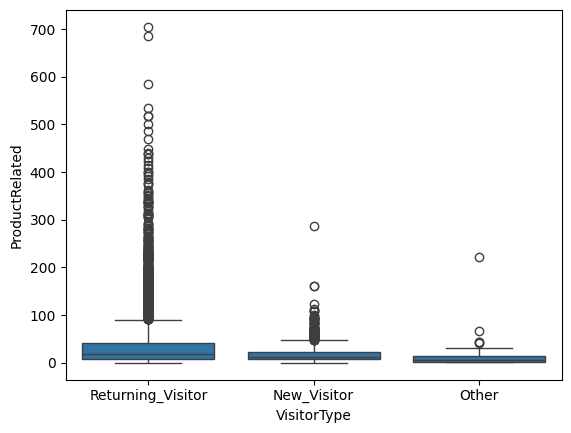

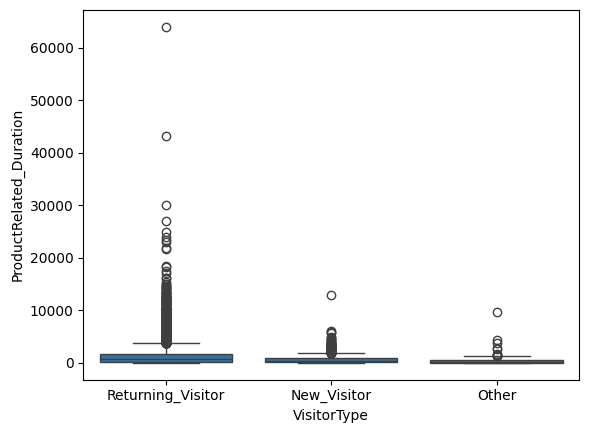

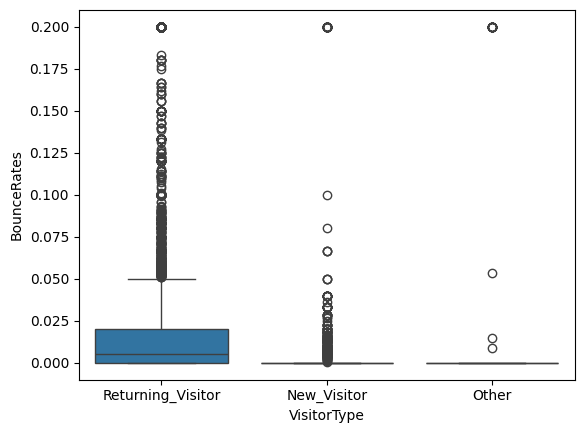

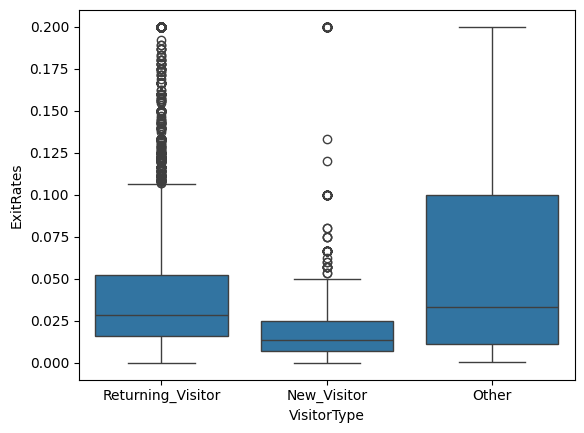

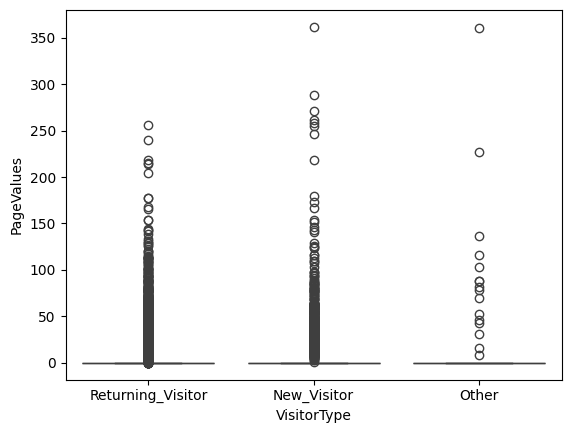

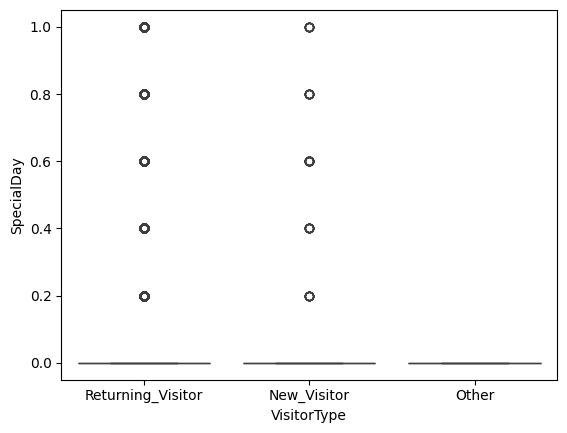

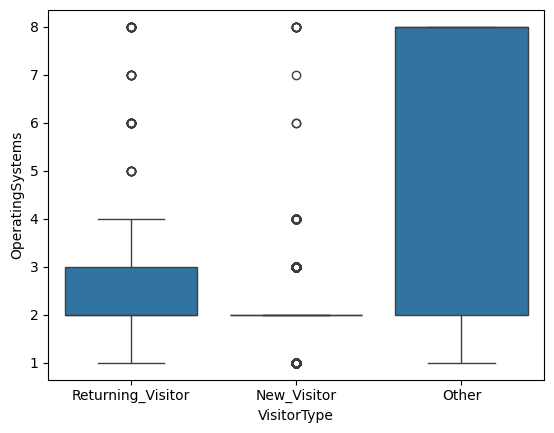

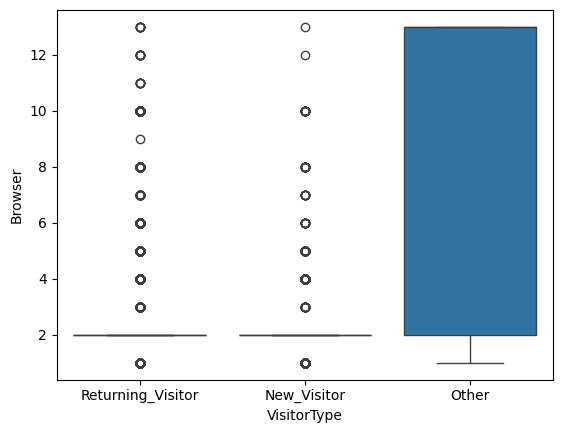

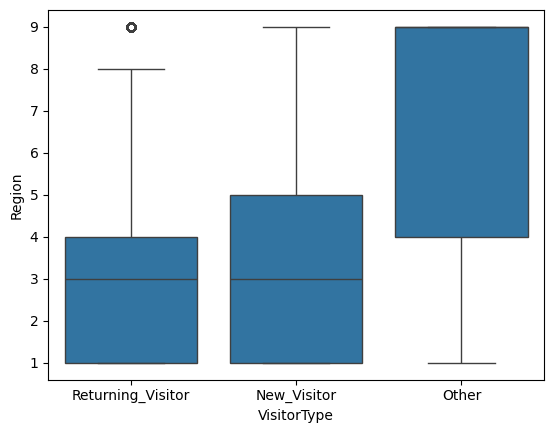

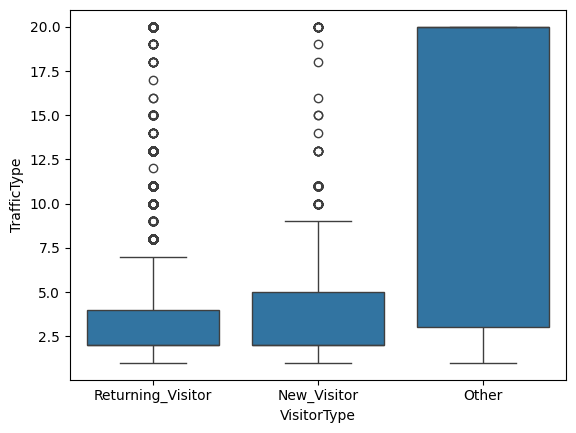

<Figure size 640x480 with 0 Axes>

In [11]:
## Boxplot between VisitorType and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='VisitorType',data=df)
  plt.show()
  plt.clf()

/tmp/ipython-input-2501256031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Month','VisitorType']).size().unstack().plot(kind='bar',stacked=False)


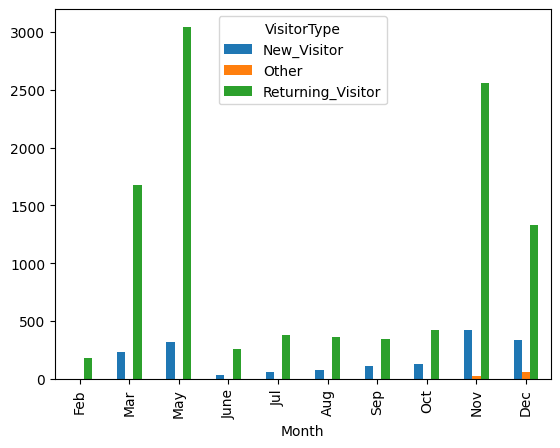

<Figure size 640x480 with 0 Axes>

In [12]:
df.groupby(['Month','VisitorType']).size().unstack().plot(kind='bar',stacked=False)
plt.show()
plt.clf()

In [13]:
## Cross Tabulation
xtab_1 = pd.crosstab(df['Month'],df['Revenue'])
xtab_2 = pd.crosstab(df['VisitorType'],df['Revenue'])
xtab_3 = pd.crosstab(df['Weekend'],df['Revenue'])
print(xtab_1)
print(xtab_2)
print(xtab_3)

Revenue  False  True 
Month                
Feb        181      3
Mar       1715    192
May       2999    365
June       259     29
Jul        366     66
Aug        357     76
Sep        362     86
Oct        434    115
Nov       2238    760
Dec       1511    216
Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470
Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499


#### Multivariate Analysis

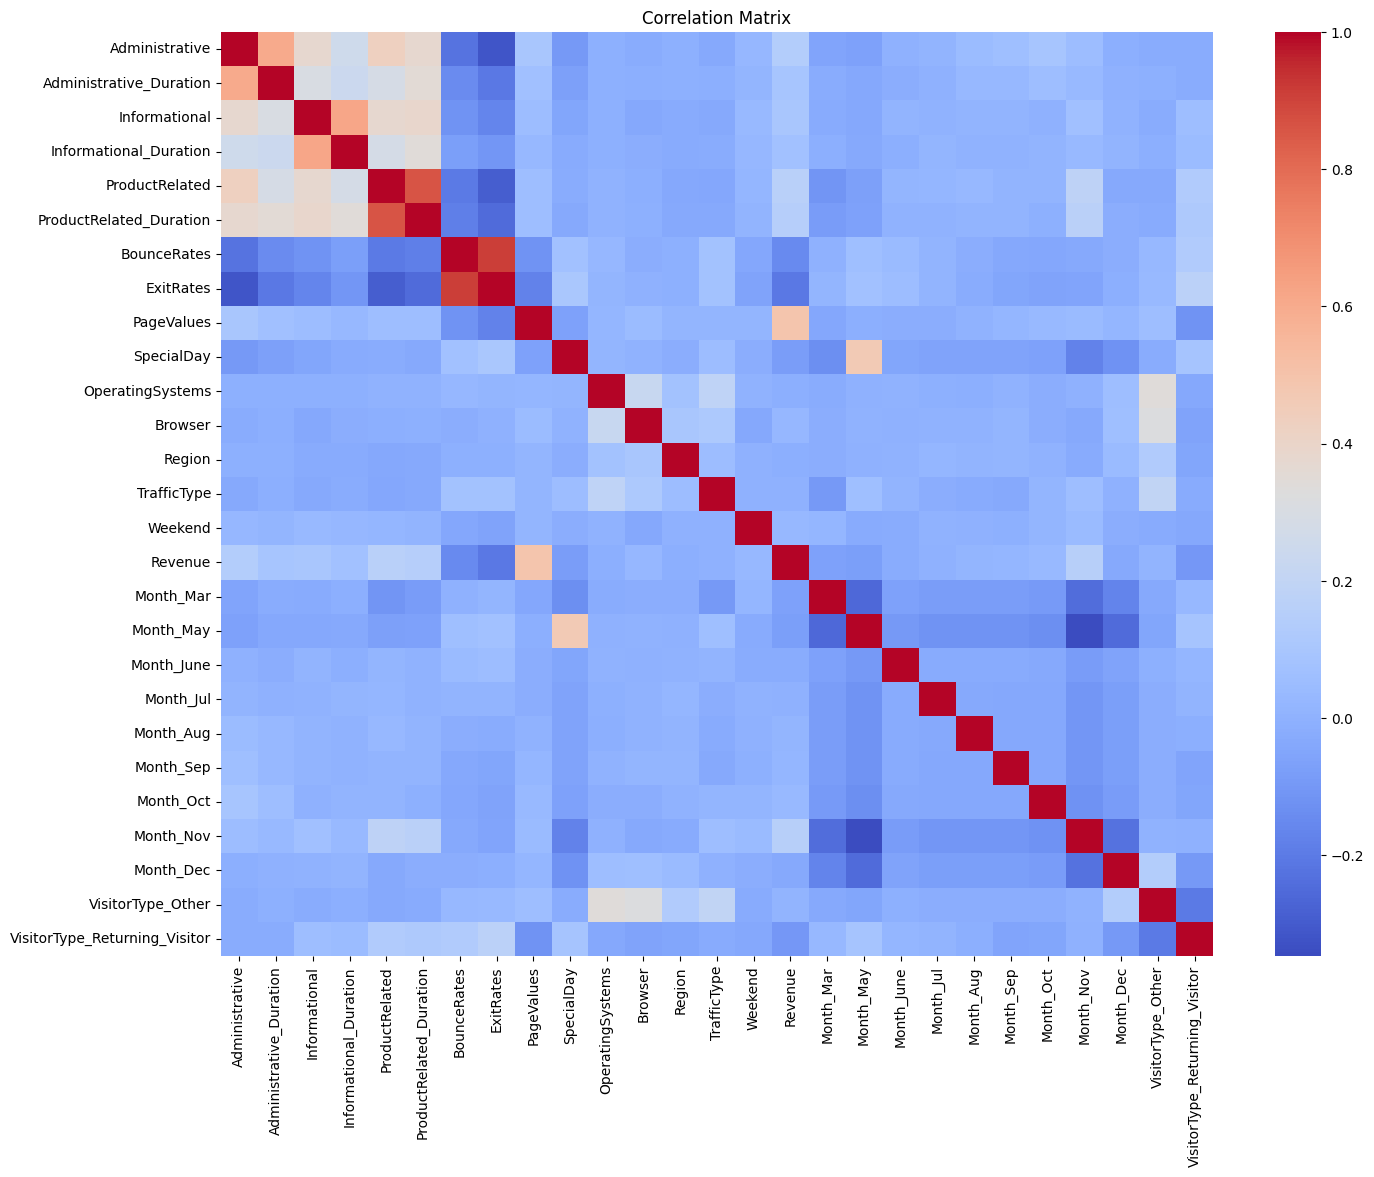

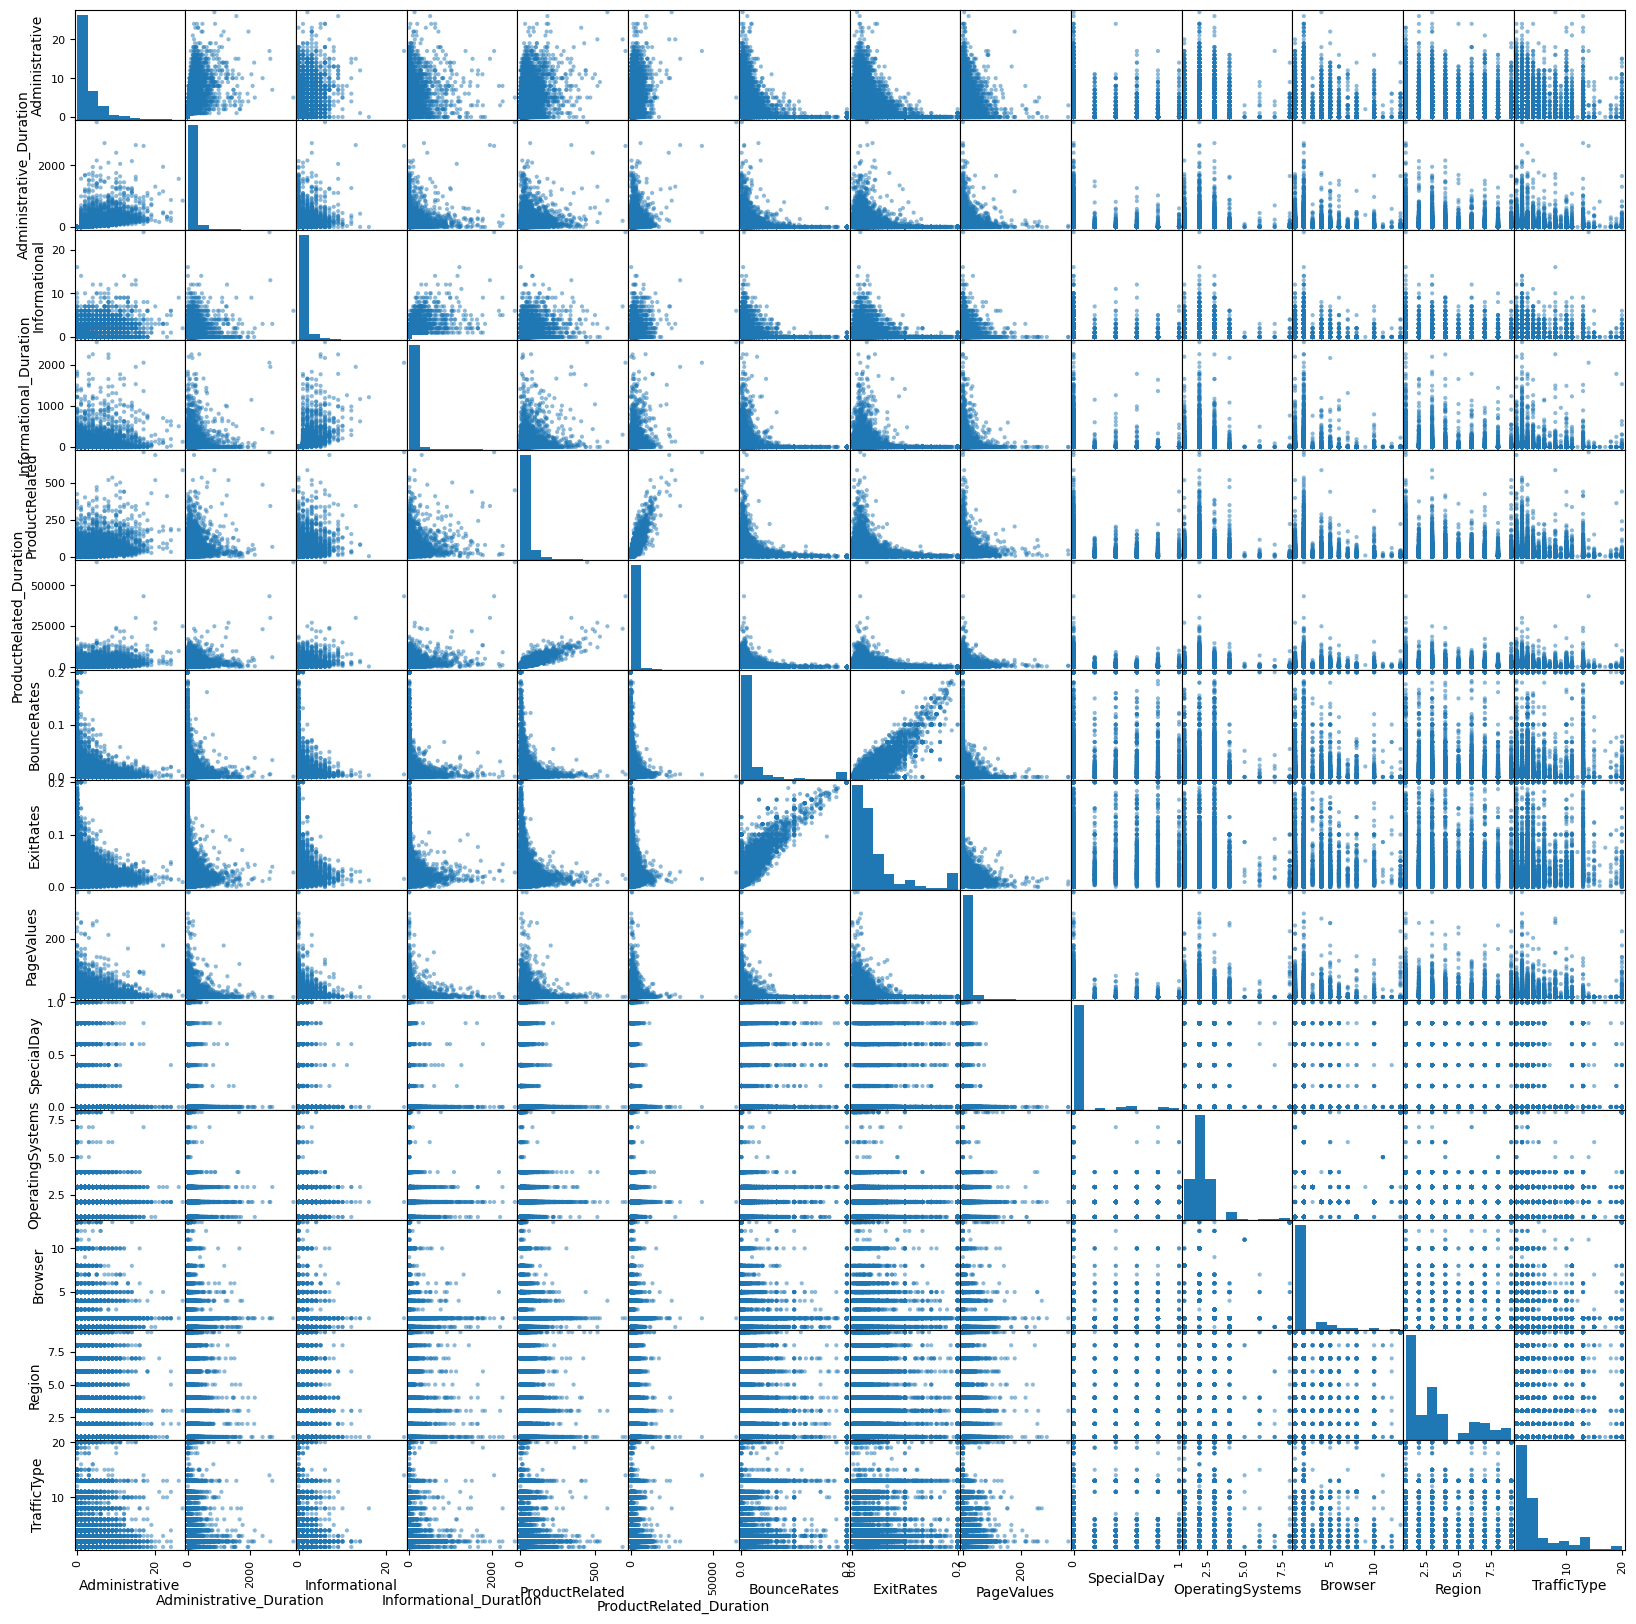

<Figure size 640x480 with 0 Axes>

In [14]:
df_ = df.copy()
df_ = pd.get_dummies(df_,drop_first=True)
corr_matrix = df_.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter matrix plot
df_for_scatter = df_.select_dtypes(exclude='bool')
pd.plotting.scatter_matrix(df_for_scatter, figsize=(20, 20))
plt.show()
plt.clf()



---



**Conclusion**\
After exploring the data and do some manipulate, i found that the data does not have missing data and have 3 type of data such as numerical, categorical and boolean, so i use graph visualizing to examine each varible that have insight below.

* In 'Month' columns, have 4 month that count more than 1500 that is March, May, November and December, then the most of visitor type is returning visitor with mostly does visit on weekday and no purchasing.
* After analyzing with correlation matrix and scatter matrix, bounce rate and exit rate are highly positive correlate while related information are moderated correlate.




---



#### Inferential Analysis



> In this step, i want to use statistical method to solve that the variables are significantly associated by using several test such as t-test, F-test, Chi-squared Test or z-test. ❓❓



In [15]:
# Chi-Squared test for 2 category variables
chi2_month = chi2_contingency(xtab_1)
chi2_visitor = chi2_contingency(xtab_2)
chi2_weekend = chi2_contingency(xtab_3)
print(chi2_month[1])
print(chi2_visitor[1])
print(chi2_weekend[1])

2.2387855164805443e-77
4.269904152293867e-30
0.0012663251061221968


In [16]:
# t-test for numerical variable against Revenue
for col in num_var.columns:
  t_test = ttest_ind(df[df['Revenue']==1][col],df[df['Revenue']==0][col])
  print(f"t-Test for {col}: p_value = {t_test[1]}")

print('----------------------------------------------------------------')

# t-test for numerical variable against Weekend
for col in num_var.columns:
  t_test = ttest_ind(df[df['Weekend']==1][col],df[df['Weekend']==0][col])
  print(f"t-Test for {col}: p_value = {t_test[1]}")

t-Test for Administrative: p_value = 3.5197598377784024e-54
t-Test for Administrative_Duration: p_value = 2.1465136347442564e-25
t-Test for Informational: p_value = 3.174034311262581e-26
t-Test for Informational_Duration: p_value = 5.282870860721331e-15
t-Test for ProductRelated: p_value = 3.2411873289224e-70
t-Test for ProductRelated_Duration: p_value = 6.115338253467455e-65
t-Test for BounceRates: p_value = 1.594197538516729e-63
t-Test for ExitRates: p_value = 1.662653625073615e-119
t-Test for PageValues: p_value = 0.0
t-Test for SpecialDay: p_value = 5.498934260229595e-20
t-Test for OperatingSystems: p_value = 0.10339431071062419
t-Test for Browser: p_value = 0.007736888294954769
t-Test for Region: p_value = 0.19794262499410464
t-Test for TrafficType: p_value = 0.5702433635793241
----------------------------------------------------------------
t-Test for Administrative: p_value = 0.0033511557038451755
t-Test for Administrative_Duration: p_value = 0.09602491065764868
t-Test for Infor

In [17]:
# F-test for numerical variable against Month
for col in num_var.columns:
  f_test = f_oneway(df[df['Month']=='Feb'][col],df[df['Month']=='Mar'][col],df[df['Month']=='May'][col],df[df['Month']=='June'][col],df[df['Month']=='Jul'][col],df[df['Month']=='Aug'][col],df[df['Month']=='Sep'][col],df[df['Month']=='Oct'][col],df[df['Month']=='Nov'][col],df[df['Month']=='Dec'][col])
  print(f"F-test for {col}: p_value = {f_test[1]}")

F-test for Administrative: p_value = 1.8017355330194312e-63
F-test for Administrative_Duration: p_value = 1.2773776637222044e-20
F-test for Informational: p_value = 7.446354949312231e-14
F-test for Informational_Duration: p_value = 7.691816947751565e-06
F-test for ProductRelated: p_value = 2.0461829423809403e-118
F-test for ProductRelated_Duration: p_value = 4.388618756794377e-84
F-test for BounceRates: p_value = 1.5571685144568384e-30
F-test for ExitRates: p_value = 3.728543398341977e-53
F-test for PageValues: p_value = 2.6212464572154173e-13
F-test for SpecialDay: p_value = 0.0
F-test for OperatingSystems: p_value = 1.544792058399227e-08
F-test for Browser: p_value = 9.010103321746434e-10
F-test for Region: p_value = 9.586898228453484e-07
F-test for TrafficType: p_value = 2.8818083795336313e-39


In [18]:
# Tukey Test after F-test
for col in num_var.columns:
  tukey = tukey_hsd(df[df['Month']=='Feb'][col],df[df['Month']=='Mar'][col],df[df['Month']=='May'][col],df[df['Month']=='June'][col],df[df['Month']=='Jul'][col],df[df['Month']=='Aug'][col],df[df['Month']=='Sep'][col],df[df['Month']=='Oct'][col],df[df['Month']=='Nov'][col],df[df['Month']=='Dec'][col])
  print(tukey)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.344     0.000    -2.146    -0.543
 (0 - 2)     -1.421     0.000    -2.207    -0.636
 (0 - 3)     -1.731     0.000    -2.710    -0.751
 (0 - 4)     -1.880     0.000    -2.794    -0.966
 (0 - 5)     -2.593     0.000    -3.506    -1.679
 (0 - 6)     -2.791     0.000    -3.700    -1.883
 (0 - 7)     -3.176     0.000    -4.060    -2.292
 (0 - 8)     -2.074     0.000    -2.862    -1.286
 (0 - 9)     -1.653     0.000    -2.458    -0.848
 (1 - 0)      1.344     0.000     0.543     2.146
 (1 - 2)     -0.077     0.998    -0.375     0.220
 (1 - 3)     -0.387     0.694    -1.043     0.270
 (1 - 4)     -0.536     0.067    -1.089     0.017
 (1 - 5)     -1.248     0.000    -1.801    -0.696
 (1 - 6)     -1.447     0.000    -1.992    -0.902
 (1 - 7)     -1.832     0.000    -2.334    -1.329
 (1 - 8)     -0.730     0.000    -1.034    -0.426
 (1 - 9)     -0.309     0.126    -0.653     

/usr/local/lib/python3.12/dist-packages/scipy/integrate/_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.334     0.023    -0.643    -0.024
 (0 - 2)     -0.337     0.016    -0.640    -0.034
 (0 - 3)     -0.476     0.003    -0.854    -0.097
 (0 - 4)     -0.429     0.005    -0.782    -0.076
 (0 - 5)     -0.456     0.002    -0.808    -0.103
 (0 - 6)     -0.480     0.001    -0.831    -0.129
 (0 - 7)     -0.401     0.008    -0.743    -0.060
 (0 - 8)     -0.559     0.000    -0.864    -0.255
 (0 - 9)     -0.425     0.001    -0.736    -0.115
 (1 - 0)      0.334     0.023     0.024     0.643
 (1 - 2)     -0.003     1.000    -0.118     0.112
 (1 - 3)     -0.142     0.752    -0.395     0.111
 (1 - 4)     -0.096     0.922    -0.309     0.118
 (1 - 5)     -0.122     0.728    -0.335     0.091
 (1 - 6)     -0.146     0.455    -0.357     0.064
 (1 - 7)     -0.068     0.985    -0.262     0.126
 (1 - 8)     -0.226     0.000    -0.343    -0.108
 (1 - 9)     -0.092     0.468    -0.225     